In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Load dataset
df = pd.read_csv("JOBS.csv")

# Step 2: Convert date columns to datetime format
df["posting_date"] = pd.to_datetime(df["posting_date"], errors="coerce", dayfirst=True)
df["application_deadline"] = pd.to_datetime(df["application_deadline"], errors="coerce", dayfirst=True)

# Step 3: Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Step 4: Map experience levels
experience_map = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
df['experience_level'] = df['experience_level'].map(experience_map)

# Step 5: Map company size
company_size_map = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size'] = df['company_size'].map(company_size_map)

# Step 6: Map employment type
employment_map = {'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type'] = df['employment_type'].map(employment_map)

# Step 7: Drop rows with missing critical info
df.dropna(subset=["posting_date", "application_deadline", "benefits_score"], inplace=True)

# Step 8: Calculate days until application deadline
df["days_until_deadline"] = (df["application_deadline"] - df["posting_date"]).dt.days

# Step 9: Clean and encode required_skills
df["required_skills"] = df["required_skills"].astype(str).str.split(", ")
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(df["required_skills"]), columns=mlb.classes_, index=df.index)
df = df.drop("required_skills", axis=1).join(skills_encoded)

# Step 10: Export cleaned dataset
df.to_csv("final_jobs_data.csv", index=False)

print("✅ Cleaned data saved to final_jobs_data.csv")


✅ Cleaned data saved to final_jobs_data.csv


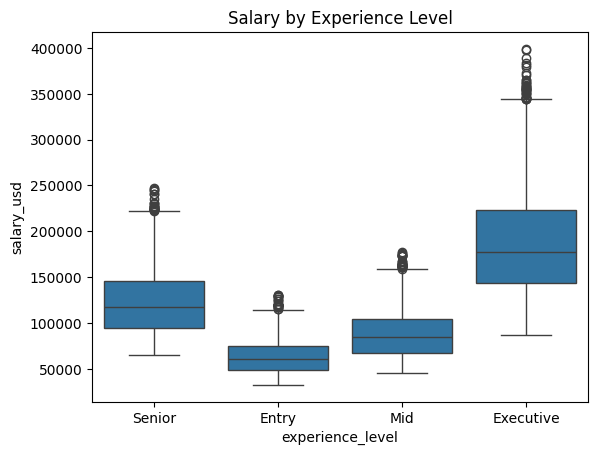

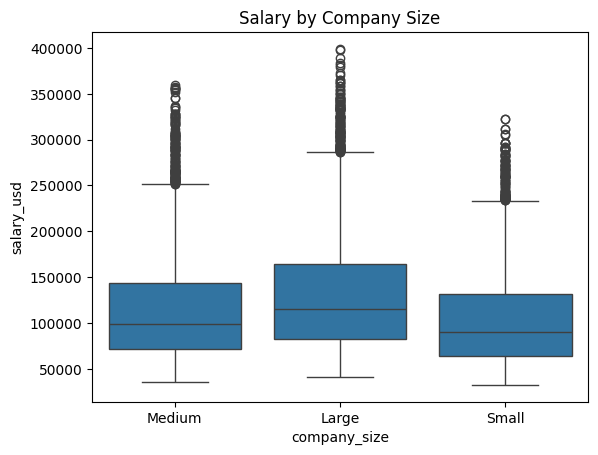

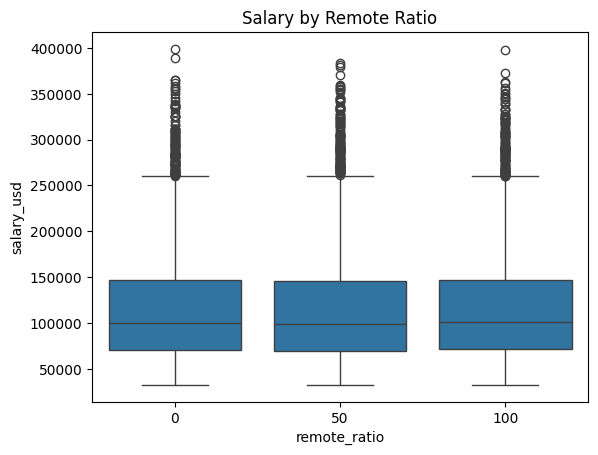

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot 1: Experience Level vs Salary
sns.boxplot(x='experience_level', y='salary_usd', data=df)
plt.title("Salary by Experience Level")
plt.show()

# Boxplot 2: Company Size vs Salary
sns.boxplot(x='company_size', y='salary_usd', data=df)
plt.title("Salary by Company Size")
plt.show()

# Boxplot 3: Remote Ratio vs Salary
sns.boxplot(x='remote_ratio', y='salary_usd', data=df)
plt.title("Salary by Remote Ratio")
plt.show()


/tmp/ipython-input-4-4148836527.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


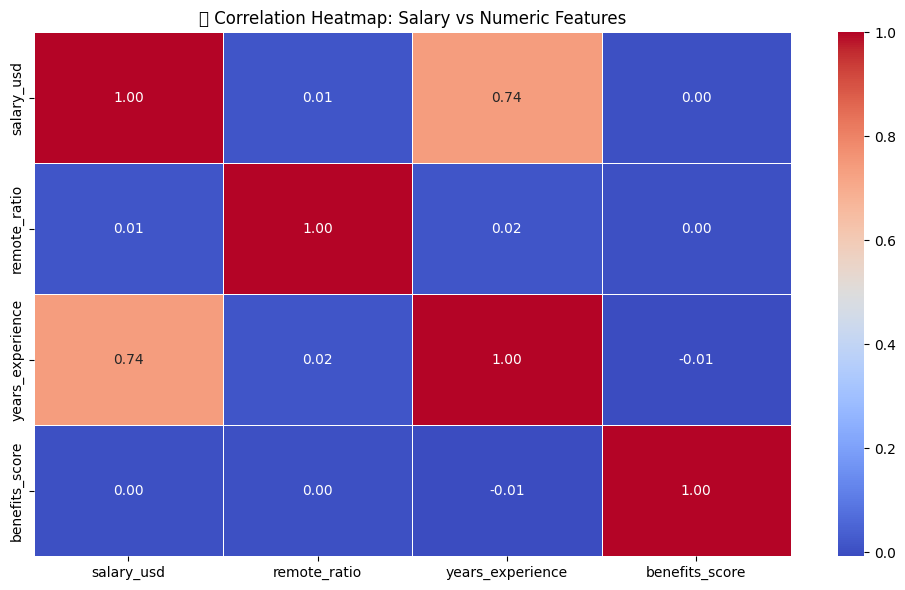

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/JOBS.csv")

# Drop irrelevant columns
drop_cols = ['job_id', 'company_name', 'salary_currency', 'application_deadline', 'job_description_length']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Fill missing values with column means
numeric_df = numeric_df.fillna(numeric_df.mean())

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📊 Correlation Heatmap: Salary vs Numeric Features")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Top 10 Hiring Industries')

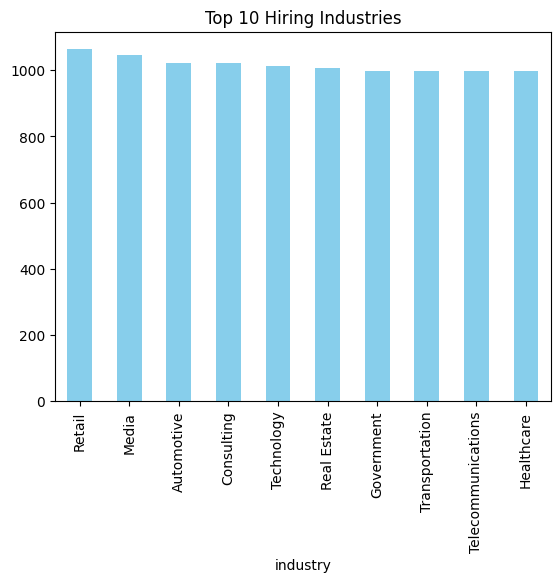

In [ ]:
df['industry'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Hiring Industries')


Text(0.5, 1.0, 'Top Paying Job Titles')

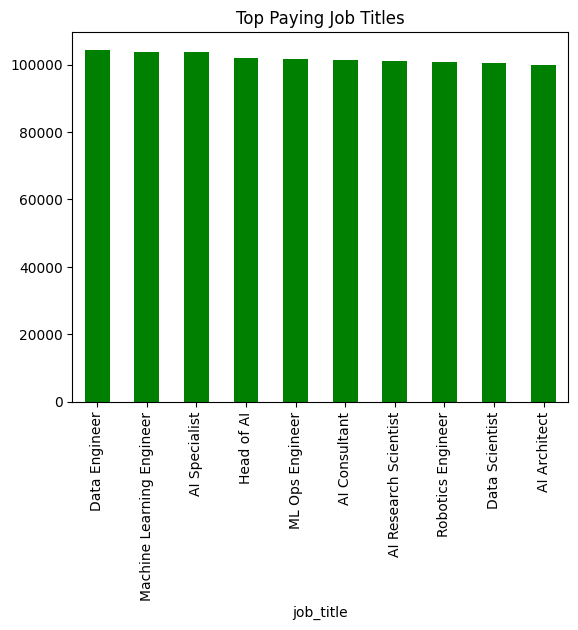

In [ ]:
df.groupby('job_title')['salary_usd'].median().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top Paying Job Titles')


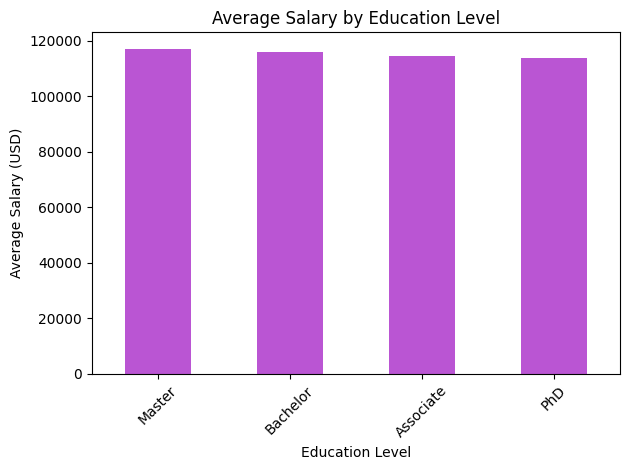

In [ ]:
# Average Salary by Education Level (Bar Plot)
df.groupby('education_required')['salary_usd'].mean().sort_values(ascending=False).plot(kind='bar', color='mediumorchid')
plt.title('Average Salary by Education Level')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Job Count by Experience Level')

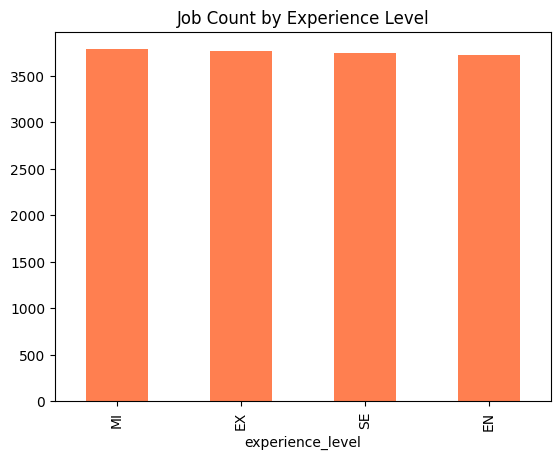

In [ ]:
df['experience_level'].value_counts().plot(kind='bar', color='coral')
plt.title('Job Count by Experience Level')


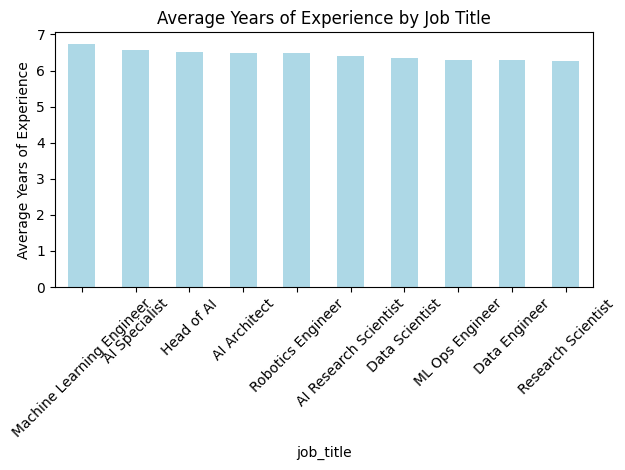

In [ ]:
# Average Years of Experience by Job Title
import matplotlib.pyplot as plt

df.groupby('job_title')['years_experience'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='lightblue')
plt.title('Average Years of Experience by Job Title')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


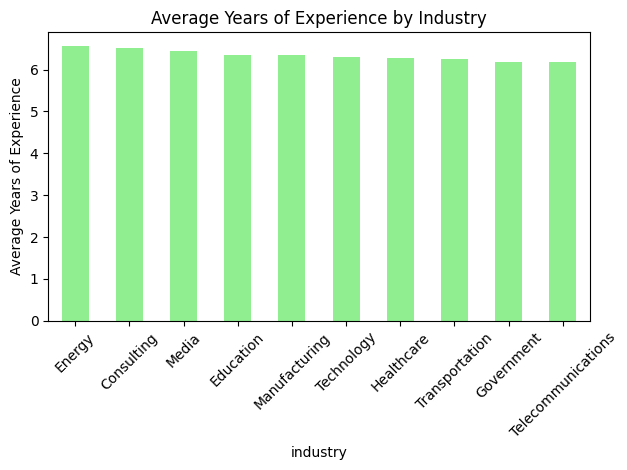

In [ ]:
# Average Years of Experience by Industry
df.groupby('industry')['years_experience'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title('Average Years of Experience by Industry')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


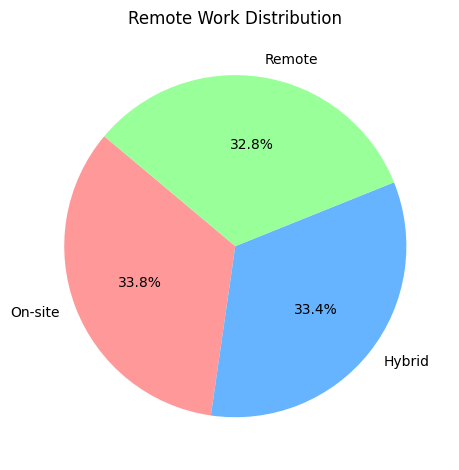

In [ ]:
# Remote vs. On-site Distribution
remote_labels = {0: 'On-site', 50: 'Hybrid', 100: 'Remote'}
remote_counts = df['remote_ratio'].value_counts()
remote_counts.index = [remote_labels.get(i, i) for i in remote_counts.index]

remote_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Remote Work Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Salary Progression by Role & Experience')

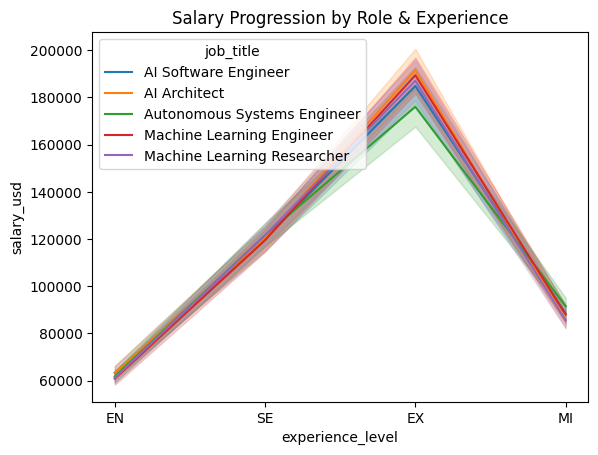

In [ ]:
# Example: Salary growth within top job titles
top_titles = df['job_title'].value_counts().head(5).index
subset = df[df['job_title'].isin(top_titles)]
sns.lineplot(data=subset, x='experience_level', y='salary_usd', hue='job_title')
plt.title("Salary Progression by Role & Experience")


Text(0.5, 1.0, 'Remote Ratio by Company Size')

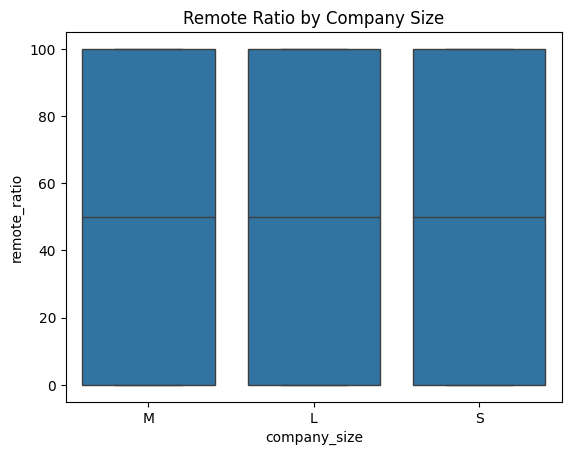

In [ ]:
sns.boxplot(x='company_size', y='remote_ratio', data=df)
plt.title('Remote Ratio by Company Size')


/tmp/ipython-input-18-3142689131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['growth_potential'] = df['salary_usd'] / df['years_experience']


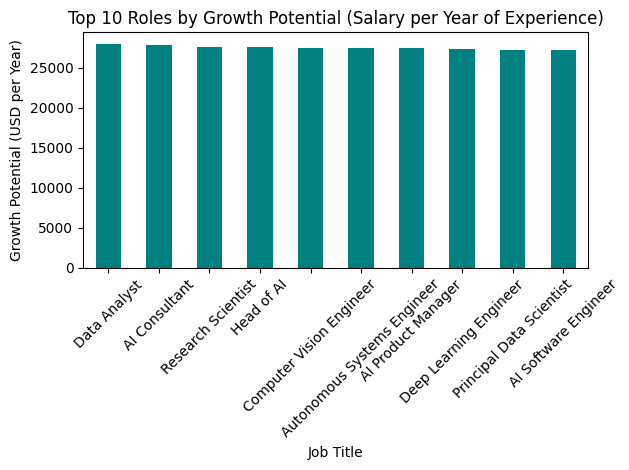

In [ ]:
# Avoid division by zero
df = df[df['years_experience'] > 0]

# Create growth_potential column
df['growth_potential'] = df['salary_usd'] / df['years_experience']

# Group by job title and calculate average growth potential
growth_by_title = df.groupby('job_title')['growth_potential'].mean().sort_values(ascending=False).head(10)

# Plot the top 10
import matplotlib.pyplot as plt

growth_by_title.plot(kind='bar', color='teal')
plt.title('Top 10 Roles by Growth Potential (Salary per Year of Experience)')
plt.xlabel('Job Title')
plt.ylabel('Growth Potential (USD per Year)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
